<a href="https://colab.research.google.com/github/albertorekena/education-improvement/blob/master/Pruebas_Outliers_Raul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
import xgboost

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN



from sklearn.metrics import mean_squared_error, make_scorer,mean_absolute_error


from sklearn.decomposition import PCA
import statsmodels.regression.linear_model as smod


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',50)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
#df_mat = pd.read_pickle('df_mat.pkl')

#df_mat.head()
df_mat = pd.read_csv('student-mat.csv', sep=';')
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## Cambiar variables a numéricas

In [0]:
df_mat.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [0]:
# Variables binarias con valores varios
df_mat['school'] = df_mat['school'].apply(lambda x: 1 if x == 'GP' else 0)
df_mat['sex'] = df_mat['sex'].apply(lambda x: 1 if x == 'F' else 0)
df_mat['address'] = df_mat['address'].apply(lambda x: 1 if x == 'U' else 0)
df_mat['famsize'] = df_mat['famsize'].apply(lambda x: 1 if x == 'GT3' else 0)
df_mat['Pstatus'] = df_mat['Pstatus'].apply(lambda x: 1 if x == 'T' else 0)

In [0]:
# Variables binarias con "yes", "no"
binary_variables = ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

for v in binary_variables:
    df_mat[v] = df_mat[v].apply(lambda x: 1 if x == 'yes' else 0)

In [0]:
df_mat.dtypes

school         int64
sex            int64
age            int64
address        int64
famsize        int64
Pstatus        int64
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup      int64
famsup         int64
paid           int64
activities     int64
nursery        int64
higher         int64
internet       int64
romantic       int64
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [0]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,1,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,1,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,1,1,15,1,0,1,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,1,1,15,1,1,1,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,1,1,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [0]:
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df


In [0]:
df_mat_one_hot = one_hot(df_mat, ["Mjob", "Fjob", "reason", "guardian"])
#quitar columnas originales (categóricas)
df_mat_one_hot = df_mat_one_hot.drop(columns = ["Mjob", "Fjob", "reason", "guardian"])
#quitar una columna de one hot de cada una de las variables para reducir la colinearidad (hace falta ver 
#cuál se quiere quitar en cada caso)
df_mat_one_hot = df_mat_one_hot.drop(columns = ["Mjob_health", "Fjob_health", "guardian_other", "reason_other"])

In [0]:
df_mat_one_hot

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1,0,0,0,0,0,0,1,1,0,0,0,1
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1,0,0,0,0,1,0,0,1,0,0,1,0
2,1,1,15,1,0,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1,0,0,0,0,1,0,0,0,0,0,0,1
3,1,1,15,1,1,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,0,0,0,0,0,0,1,0,0,1,0,0,1
4,1,1,16,1,1,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,0,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,0,0,2,2,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,9,9,0,0,1,0,0,0,1,0,1,0,0,0,0
391,0,0,17,1,0,1,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,14,16,16,0,0,1,0,0,0,1,0,1,0,0,0,1
392,0,0,21,0,1,1,1,1,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7,0,1,0,0,0,1,0,0,1,0,0,0,0
393,0,0,18,0,0,1,3,2,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,10,0,0,1,0,0,1,0,0,1,0,0,0,1


In [0]:
df_mat_one_hot.shape

(395, 42)

In [0]:
df_mat_one_hot = df_mat_one_hot.drop(columns = ["G1", "G2"])

In [0]:
df_mat_one_hot.drop(columns = ["G3"]).columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'Mjob_at_home', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_reputation', 'guardian_father',
       'guardian_mother'],
      dtype='object')

# Quitar los 0's y reemplazarlos por la media de G1 y G2

In [0]:
df_mat["G12"] = (df_mat["G1"]+df_mat["G2"])/2


In [0]:
df_mat['G3New'] = np.where((df_mat['G3'] == 0 ), #For rows with G3 == 0 
                           df_mat['G12'].apply(np.floor),      #We place rounded down "G12" values
                           df_mat['G3'])      #In column "G3"

In [0]:
df_mat_one_hot["G3"] = df_mat["G3New"]

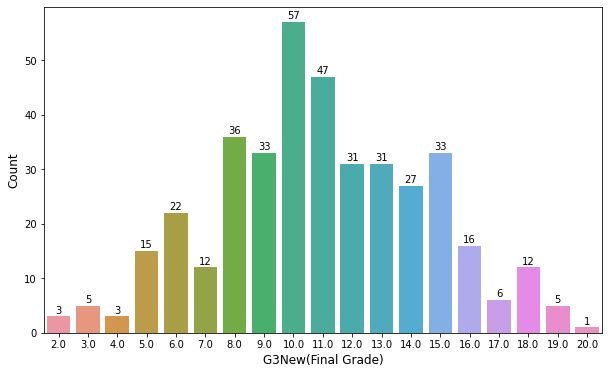

In [0]:
plt.figure(figsize = (10,6))
ax = sns.countplot(df_mat['G3New'])
plt.xlabel('G3New(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 0.6,p.get_height(),ha = 'center')

In [0]:
#Llegados a este punto, df_mat_one_hot contiene la base de datos sin G1, G2, y con las variables categóricas 
#pasadas a numéricas mediante one_hot. 
#Además, los 0 de G3 han sido sustituidos por la media entre G1 y G2 para normalizar la curva

df_mat_one_hot.shape

(395, 40)

# Probar con rangos de notas


In [0]:
#Introducir el número de rangos deseados
n_bags = 5
df_mat_one_hot.loc[df_mat_one_hot['G3'] <= 4,'G3Bagged'] = 1
df_mat_one_hot.loc[(df_mat_one_hot['G3'] > 4) & (df_mat_one_hot['G3'] <= 8),'G3Bagged'] = 2
df_mat_one_hot.loc[(df_mat_one_hot['G3'] > 8) & (df_mat_one_hot['G3'] <= 12),'G3Bagged'] = 3
df_mat_one_hot.loc[(df_mat_one_hot['G3'] > 12) & (df_mat_one_hot['G3'] <= 16),'G3Bagged'] = 4
df_mat_one_hot.loc[(df_mat_one_hot['G3'] > 16) & (df_mat_one_hot['G3'] <= 20),'G3Bagged'] = 5
df_mat["G3Bagged"] = df_mat_one_hot["G3Bagged"]

In [0]:
scalefactor =20/n_bags
#df_mat["G3Bagged"] = df_mat["G3New"].apply(lambda x: x/scalefactor)
#df_mat["G3Bagged"] = df_mat["G3New"].apply(lambda x: math.floor((x+1)/scalefactor))


#df_mat_one_hot["G3Bagged"] = df_mat["G3Bagged"]

In [0]:

# Define our dependent variable

y_column = 'G3Bagged'
y = df_mat_one_hot[y_column]
# Define  our independent variables
#x_columns = ["absences", "goout", "romantic", "higher", "famsup", "failures", "studytime", "age", "sex"]
x_columns = df_mat_one_hot.drop(columns = ["G3", "G3Bagged"]).columns
X = df_mat_one_hot[x_columns]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
#X['cnst'] = 0
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1Bagged = smod.OLS(endog = y_train,exog = X_train).fit()
print(scalefactor, model1Bagged.rsquared)
#print(model1Bagged.summary())

4.0 0.9414552270011668


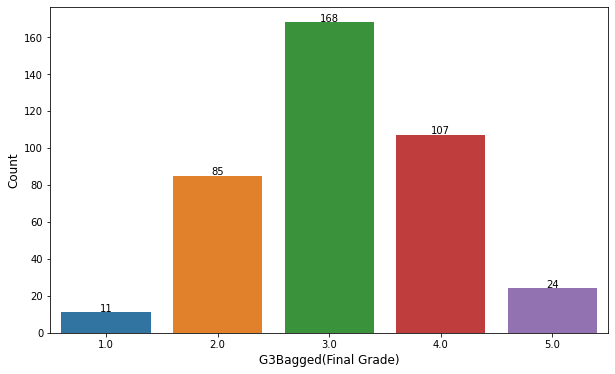

In [0]:
plt.figure(figsize = (10,6))
ax = sns.countplot(df_mat['G3Bagged'])
plt.xlabel('G3Bagged(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 0.6,p.get_height(),ha = 'center')

In [0]:
y_pred_test = model1Bagged.predict(X_test)
print(f'root mean squared error on test data: {np.sqrt(mean_squared_error(y_test,y_pred_test)):.4}')


root mean squared error on test data: 0.8501


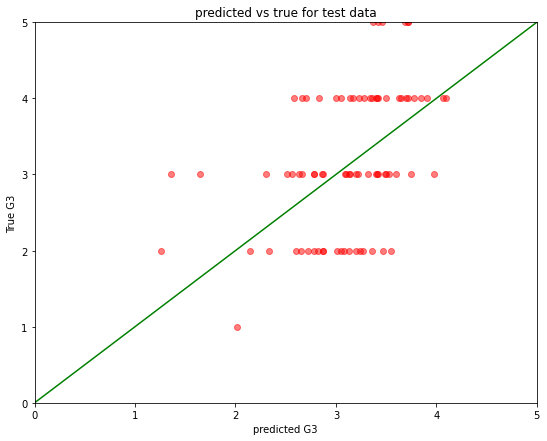

In [0]:
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test, y_test, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('predicted G3')
plt.ylabel('True G3')
plt.xlim(0,20/scalefactor)
plt.ylim(0,20/scalefactor)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g');
plt.show();

In [0]:
y_pred_test_bagged = y_pred_test.apply(lambda x: round(x))
y_test_bagged = y_test.apply(lambda x: round(x))
print(f'root mean squared error on test data: {np.sqrt(mean_squared_error(y_test_bagged,y_pred_test_bagged)):.4}')


root mean squared error on test data: 0.9001


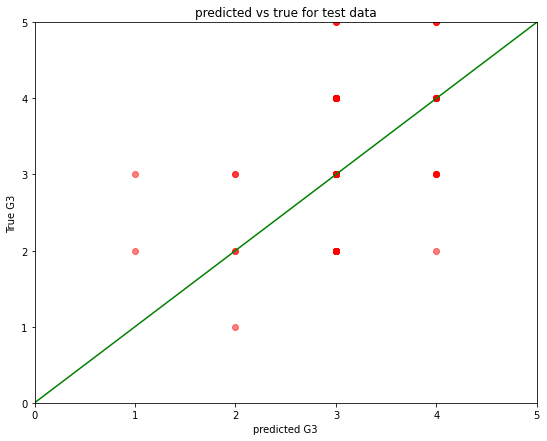

In [0]:
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test_bagged, y_test_bagged, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('predicted G3')
plt.ylabel('True G3')
plt.xlim(0,20/scalefactor)
plt.ylim(0,20/scalefactor)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g');
plt.show();

In [0]:
y_pred_test.describe()

count    79.000000
mean      3.120815
std       0.560222
min       1.261166
25%       2.805764
50%       3.204928
75%       3.477075
max       4.098948
dtype: float64

In [0]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,1,0,0,0,0,0,0,1,1,0,0,0,1
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,1,0,0,0,0,1,0,0,1,0,0,1,0
2,1,1,15,1,0,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,1,0,0,0,0,1,0,0,0,0,0,0,1
3,1,1,15,1,1,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,0,0,0,0,0,0,1,0,0,1,0,0,1
4,1,1,16,1,1,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,0,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,0,0,2,2,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,0,0,1,0,0,0,1,0,1,0,0,0,0
391,0,0,17,1,0,1,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,0,0,1,0,0,0,1,0,1,0,0,0,1
392,0,0,21,0,1,1,1,1,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,0,1,0,0,0,1,0,0,1,0,0,0,0
393,0,0,18,0,0,1,3,2,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,0,0,1,0,0,1,0,0,1,0,0,0,1


#Escalado

In [0]:
scaler = StandardScaler()

In [0]:
df_mat_one_hot_rescaled = scaler.fit_transform(df_mat_one_hot)

In [0]:
df_mat_one_hot_rescaled = pd.DataFrame(df_mat_one_hot_rescaled, columns = df_mat_one_hot.columns)

In [0]:
#df_mat_one_hot_rescaled = df_mat_one_hot

##Búsqueda de outliers

In [0]:
from sklearn.ensemble import IsolationForest



In [0]:
X.shape

(395, 39)

In [0]:
clf = IsolationForest(n_estimators=100, max_samples=150, contamination = 0.05, max_features=0.9,  random_state=42)
clf.fit(df_mat_one_hot)
outliers = clf.predict(df_mat_one_hot)
#y_pred_test = clf.predict(df_mat_one_hot)
#y_pred_outliers = clf.predict(X_outliers)

In [0]:
print(np.unique(outliers, return_counts=True)) #, np.unique(y_pred_test, return_counts=True))
print("Outliers detected:", list(outliers).count(-1)/outliers.shape[0])
#print("Outliers detected on train:", list(y_pred_train).count(-1)/y_pred_train.shape[0])

#a = numpy.array([0, 3, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 3, 4])
unique, counts = np.unique(y_pred_train, return_counts=True)
#>>> dict(zip(unique, counts))

(array([-1,  1]), array([ 20, 375]))
Outliers detected: 0.05063291139240506


In [0]:
outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [0]:
[i for i in range(len(outliers)) if outliers[i] == -1]

[52,
 61,
 108,
 134,
 150,
 153,
 164,
 239,
 247,
 276,
 336,
 349,
 350,
 369,
 371,
 380,
 384,
 390,
 392,
 394]

In [0]:
df_mat_outliers = df_mat.iloc[[i for i in range(len(outliers)) if outliers[i] == -1]]

In [0]:
df_mat_outliers.shape

(20, 36)

In [0]:
df_mat_outliers

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G12,G3New,G3Bagged
52,1,0,15,1,0,0,4,2,health,health,other,father,2,1,1,0,0,0,0,1,1,0,0,5,5,5,3,4,5,6,11,11,10,11.0,10.0,3.0
61,1,1,16,1,1,1,1,1,services,services,course,father,4,1,0,1,1,0,1,0,1,1,1,5,5,5,5,5,5,6,10,8,11,9.0,11.0,3.0
108,1,0,15,0,1,1,4,4,other,other,home,father,4,4,0,0,1,1,1,1,1,1,1,1,3,5,3,5,1,6,10,13,13,11.5,13.0,4.0
134,1,0,15,0,1,1,3,4,at_home,teacher,course,mother,4,2,0,0,1,0,0,1,1,0,1,5,3,3,1,1,5,0,9,0,0,4.5,4.0,1.0
150,1,0,18,1,0,1,1,1,other,other,course,mother,1,1,3,0,0,0,0,1,0,1,1,2,3,5,2,5,4,0,6,5,0,5.5,5.0,2.0
153,1,0,19,1,1,1,3,2,services,at_home,home,mother,1,1,3,0,1,0,0,1,0,1,1,4,5,4,1,1,4,0,5,0,0,2.5,2.0,1.0
164,1,0,17,0,0,1,1,1,other,services,course,mother,4,2,3,0,0,0,1,1,0,0,1,5,3,5,1,5,5,0,5,8,7,6.5,7.0,2.0
239,1,0,18,1,1,1,2,2,other,services,reputation,father,1,2,1,0,0,0,0,1,0,1,0,5,5,4,3,5,2,0,7,7,0,7.0,7.0,2.0
247,1,0,22,1,1,1,3,1,services,services,other,mother,1,1,3,0,0,0,0,0,0,1,1,5,4,5,5,5,1,16,6,8,8,7.0,8.0,2.0
276,1,1,18,0,1,0,3,2,other,services,home,mother,2,2,0,0,0,0,0,0,0,1,1,4,1,1,1,1,5,75,10,9,9,9.5,9.0,3.0


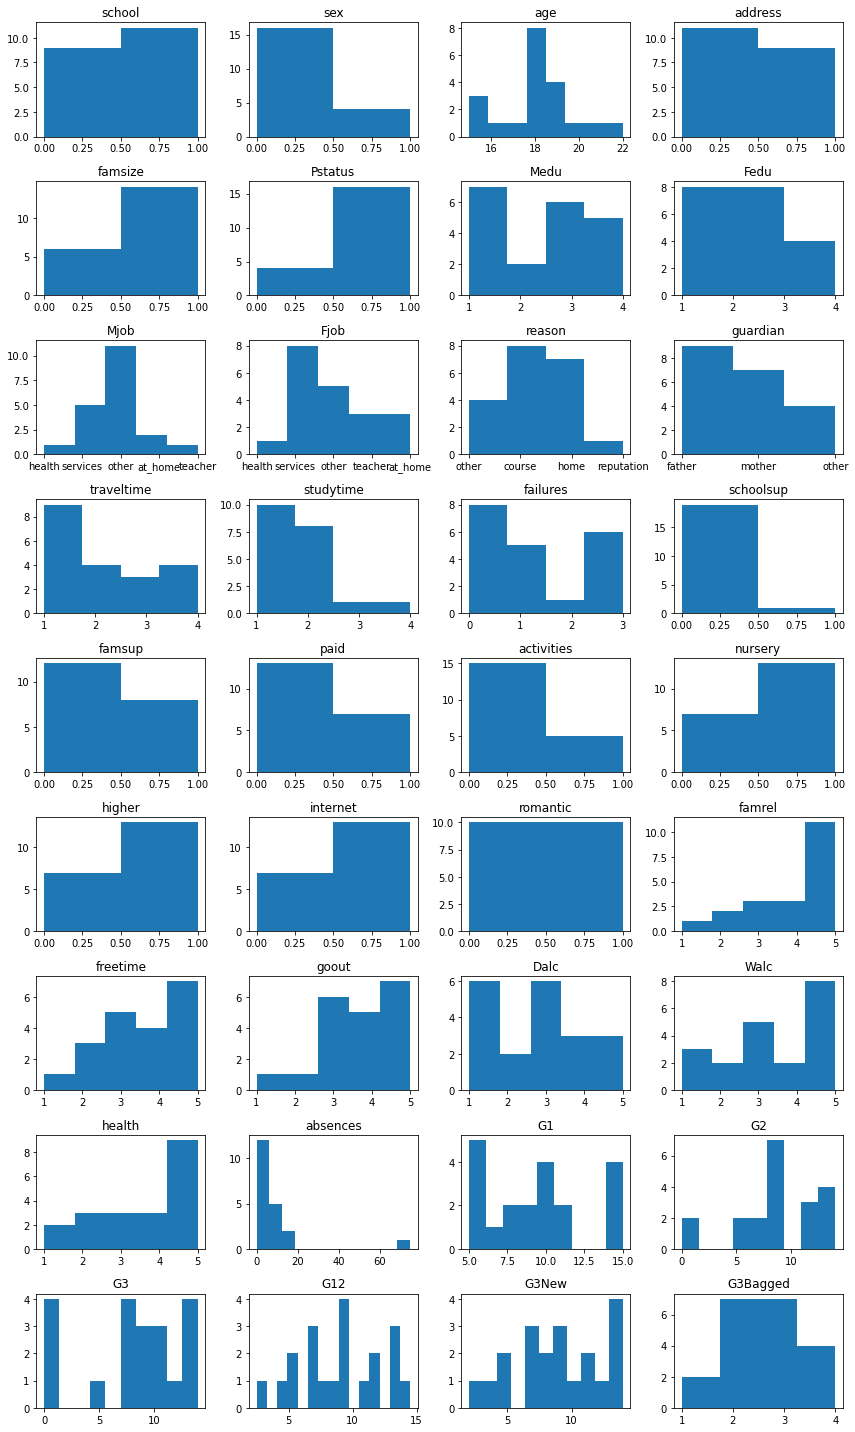

In [0]:
#df_mat_histograms = df_mat_outliers
fig = plt.figure(figsize = (12,20))
for i in range(1,df_mat_outliers.shape[1] + 1):
    plt.subplot(9,4,i)
    ax = plt.gca()
    ax.set_title(df_mat_outliers.columns[i - 1],fontsize = 12)
    ax.tick_params(axis = 'x')
    n_unique_values = len(df_mat_outliers.iloc[:,i - 1].unique())
    plt.hist(df_mat_outliers.iloc[:,i - 1],bins = n_unique_values)
fig.tight_layout();